Imports

###### Plotly had an update so need to edit all plotly graphs.

In [16]:
# -*- coding: utf-8 -*-
"""
This file was made in Spyder Editor

Created on Sat Mar 17 23:31:45 2019

@author: jevon
"""
#This is a supervised classification problem.

import numpy as np
from openpyxl import load_workbook
from scipy import stats
from scipy.stats import norm, skew
import statsmodels.api as sm
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile

#data visualisation
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None

#plotly
import plotly
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

#plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf #Need to research this.
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#ML model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#data modeling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier #Need to research this.
from sklearn.ensemble import RandomForestClassifier

#helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

#misc
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
 


In [8]:
df_source = pd.read_excel('WA_Fn-UseC_-HR-Employee-Attrition.xlsx', sheet_name = 0) #add path to Excel source file
print("Shape of dataframe is: {}".format(df_source.shape))

df_human_resources = df_source.copy()

df_human_resources.columns

df_human_resources.head()

df_human_resources.columns.to_series().groupby(df_human_resources.dtypes).groups



Shape of dataframe is: (1470, 35)


{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

In [9]:
#Datatypes and missing values
df_human_resources.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [10]:
#Overview of numerical features
df_human_resources.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d02117c50>,
      dtype=object)

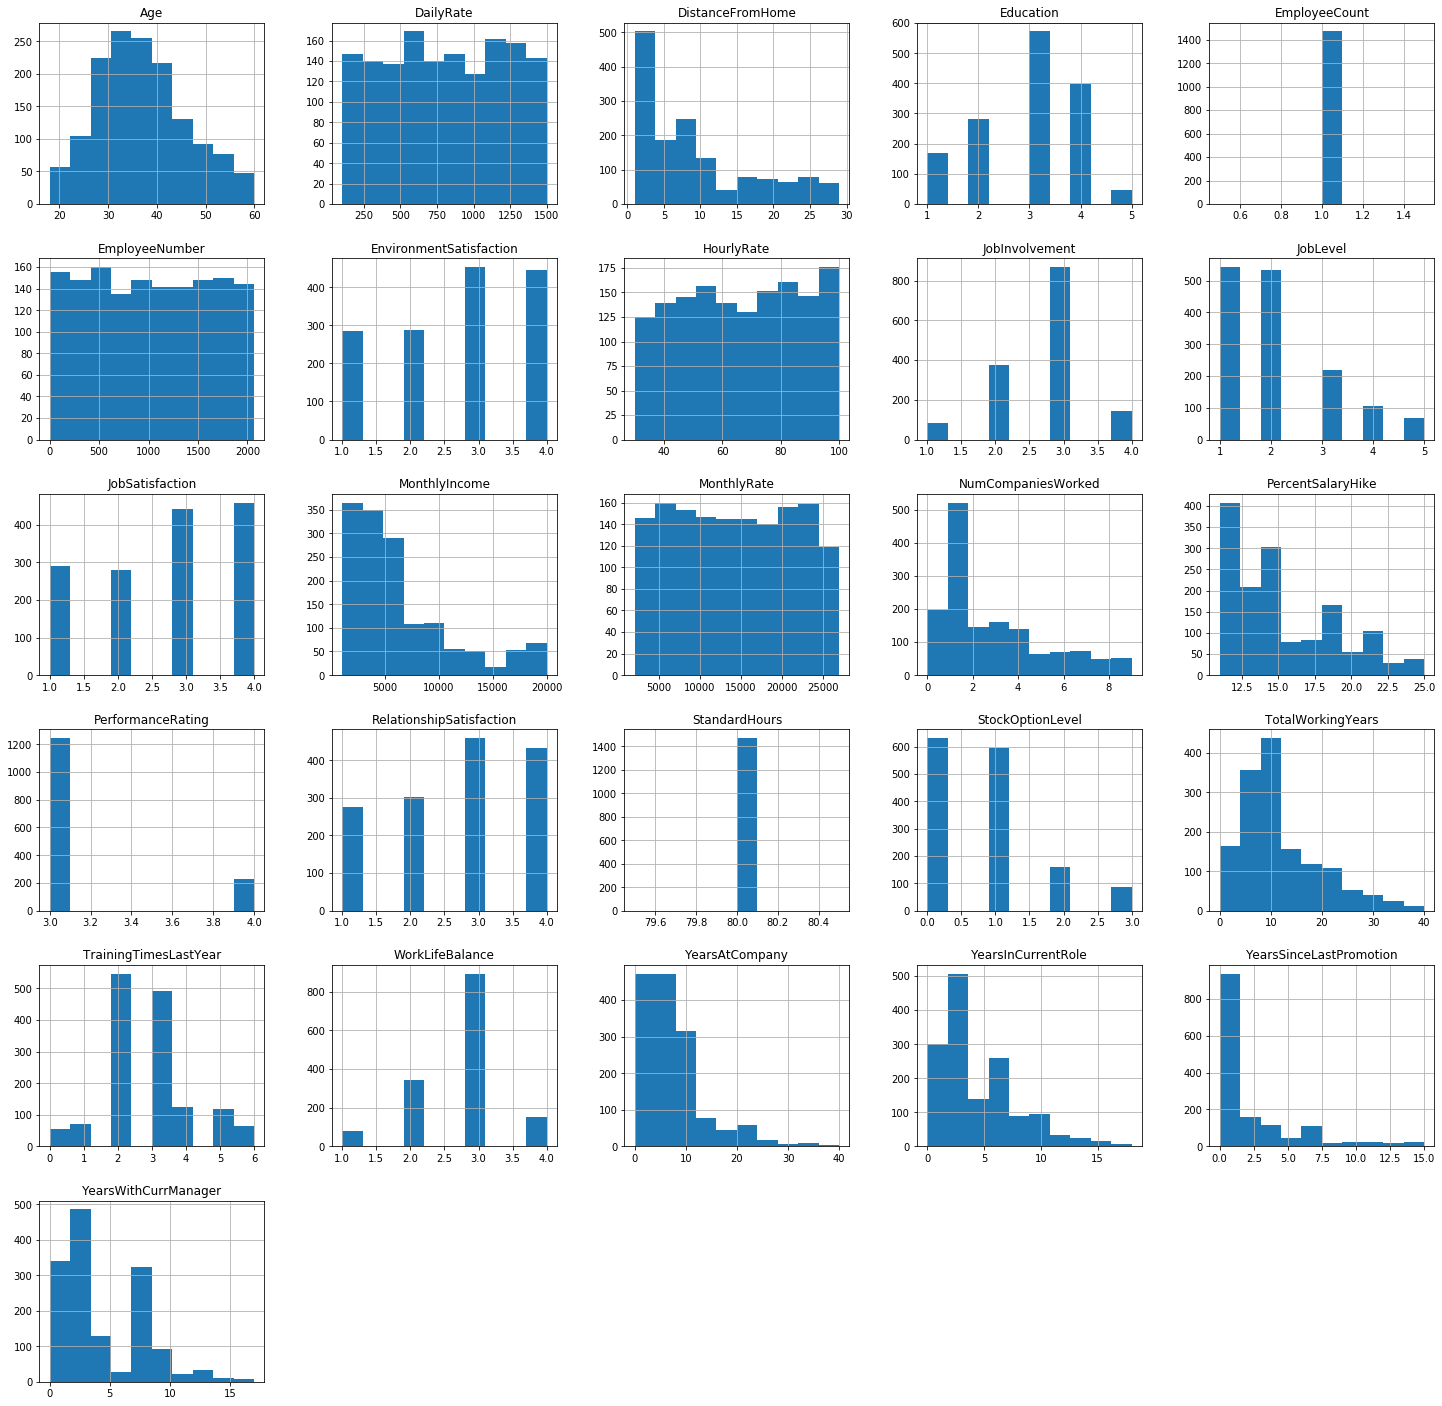

In [11]:
df_human_resources.hist(figsize=(25,25))


#### Overview of features by attribute

In [12]:
#Begin Age data
(mu, sigma) = norm.fit(df_human_resources.loc[df_human_resources['Attrition'] == 'Yes', 'Age'])
print('Ex: average age = {:0.2f} years with standard deviation = {:0.2f}' .format(mu, sigma))
(mu, sigma) = norm.fit(df_human_resources.loc[df_human_resources['Attrition'] == 'No', 'Age'])
print('Current: average age = {:0.2f} years with standard deviation = {:0.2f}' .format(mu, sigma))


Ex: average age = 33.61 years with standard deviation = 9.67
Current: average age = 37.56 years with standard deviation = 8.88


In [17]:
x1 = df_human_resources.loc[df_human_resources['Attrition'] == 'No', 'Age']
x2 = df_human_resources.loc[df_human_resources['Attrition'] == 'Yes', 'Age']

hist_data = [x1, x2]
group_labels = ['Active', 'Inactive']

fig = ff.create_distplot(hist_data, group_labels, curve_type = 'kde', show_hist = False, show_rug = False)
iplot(fig)

# fig['Layout'].update(title = 'Age Distritbuion by Attrition')
# fig['Layout'].update(xaxis = dict(range=[10, 60], dticks = 5))

# py.iplot(fig, filename = 'Distplot with Multiple Datasets')


In [18]:
#Educational Background areas

df_human_resources['EducationField'].value_counts()


df_EducationField = pd.DataFrame(columns=["EducationField", "% of Leavers"])
i = 0
for field in list(df_human_resources['EducationField'].unique()):
    ratio = (df_human_resources[(df_human_resources['EducationField']==field)&(df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources["EducationField"]==field].shape[0])
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1

df_EducationFieldGroup = df_EducationField.groupby(by="EducationField").sum()
df_EducationFieldGroup.iplot(kind='bar', title='Leavers by Education field (%)')



In [19]:
#Gender distribution

df_human_resources['Gender'].value_counts()

print("Normalised gender distribution of ex-employees in the dataset: Male = {:0.2f}%; Female = {:0.2f}%.".format((df_human_resources[(df_human_resources['Attrition']=="Yes") & (df_human_resources['Gender'] == 'Male')].shape[0] / df_human_resources[df_human_resources['Gender']=='Male'].shape[0])*100, (df_human_resources[(df_human_resources['Attrition']=="Yes") & (df_human_resources['Gender'] == 'Female')].shape[0] / df_human_resources[df_human_resources['Gender']=='Female'].shape[0])*100))

# df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"]).reindex(columns=['Gender', 'Attrition'=='Yes'])
# df_Gender = pd.DataFrame.groupby(['Gender']).agg({'% of Leavers': 'sum'}).reindex()
df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i = 0
for field in list(df_human_resources['Gender'].unique()):
    ratio = (df_human_resources[(df_human_resources['Gender']==field)&(df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources["Gender"]==field].shape[0])
    df_Gender.loc[i] = (field, ratio*100)
    i += 1

df_GenderGroup = df_Gender.groupby(by = "Gender").sum()
df_GenderGroup.iplot(kind = 'bar', title = 'Leavers by Gender (%)')



Normalised gender distribution of ex-employees in the dataset: Male = 17.01%; Female = 14.80%.


In [10]:
df_Gender.head()

,Gender,% of Leavers
0,Female,14.795918
1,Male,17.006803


In [20]:
#Marital Status

df_human_resources['MaritalStatus'].value_counts()

df_MaritalStatus = pd.DataFrame(columns=["MaritalStatus", "% of Leavers"])
i=0
for field in list(df_human_resources['MaritalStatus'].unique()):
    ratio = df_human_resources[(df_human_resources['MaritalStatus']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['MaritalStatus']==field].shape[0]
    df_MaritalStatus.loc[i] = (field, ratio*100)
    i += 1

df_MaritalStatusGroup = df_MaritalStatus.groupby(by="MaritalStatus").sum()
df_MaritalStatusGroup.iplot(kind='bar', title='Leavers by Marital Status (%)')



In [21]:
#Distance from Home

print("Distance from home for employees to get to work is from {:0.2f} to {:0.2f} miles.".format(df_human_resources['DistanceFromHome'].min(), df_human_resources['DistanceFromHome'].max()))

print('Average distance from home for currently active employees: {:0.2f} miles and ex-employees: {:0.2f} miles'.format(df_human_resources[df_human_resources['Attrition']=='No']['DistanceFromHome'].mean(), df_human_resources[df_human_resources['Attrition']=='Yes']['DistanceFromHome'].mean()))

x1 = df_human_resources.loc[df_human_resources['Attrition']=='No', 'DistanceFromHome']
x2 = df_human_resources.loc[df_human_resources['Attrition']=='Yes', 'DistanceFromHome']

hist_data = [x1, x2]
group_labels = ['Active Employees', 'Non-Active Amployees']

fig = ff.create_distplot(hist_data, group_labels, curve_type='kde', show_hist=False, show_rug=False)

fig['layout'].update(title='Distance from Home Distribution in Percent by Status')
fig['layout'].update(xaxis=dict(range=[0,50], dtick=5))

iplot(fig, filename='Distplot with Multiple Datasets')



Distance from home for employees to get to work is from 1.00 to 29.00 miles.
Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


In [22]:
# #Begin Department data analysis

# df_human_resources['Department'].value_counts()

# df_Department = pd.DataFrame(columns = ["Department", "% of Leavers"])

# i=0
# for field in list(df_human_resources['Department'].unique()):
#     ratio = df_human_resources[(df_human_resources['Department']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['Department']==field].shape[0]
#     df_Department.loc[i] = (field, ratio*100)
#     i += 1

# df_DepartmentGroup = df_human_resources['Department'].groupby('Department').sum()
    
# df_DepartmentGroup = df_human_resources['Department'].groupby(by='Department').sum()
# df_DepartmentGroup.iplot(kind='bar', title="Leavers by Department (%)")



In [23]:
#Frequency of Travel, Job Roles, Job Level, and Job Involvement

df_human_resources['BusinessTravel'].value_counts()

df_BusinessTravel = pd.DataFrame(columns=["BusinessTravel", "% of Leavers"])
i = 0
for field in list(df_human_resources['BusinessTravel'].unique()):
    ratio = df_human_resources[(df_human_resources['BusinessTravel']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1

df_BusinessTravel_Group = df_BusinessTravel.groupby(by="BusinessTravel").sum()
df_BusinessTravel_Group.iplot(kind='bar', title='Leavers by Business Travel (%)')

df_human_resources['JobRole'].value_counts()

df_JobRole = pd.DataFrame(columns=["JobRole", "% of Leavers"])
i = 0
for field in list(df_human_resources['JobRole'].unique()):
    ratio = df_human_resources[(df_human_resources['JobRole']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1

df_JobRole_Group = df_JobRole.groupby(by="JobRole").sum()
df_JobRole_Group.iplot(kind='bar', title='Leavers by Job Role (%)')

df_human_resources['JobLevel'].value_counts()

df_JobLevel = pd.DataFrame(columns=["JobLevel", "% of Leavers"])
i = 0
for field in list(df_human_resources['JobLevel'].unique()):
    ratio = df_human_resources[(df_human_resources['JobLevel']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1

df_JobLevel_Group = df_JobLevel.groupby(by="JobLevel").sum()
df_JobLevel_Group.iplot(kind='bar', title='Leavers by Job Level (%)')

df_human_resources['JobInvolvement'].value_counts()

df_JobInvolvement = pd.DataFrame(columns=["JobInvolvement", "% of Leavers"])
i = 0
for field in list(df_human_resources['JobInvolvement'].unique()):
    ratio = df_human_resources[(df_human_resources['JobInvolvement']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['JobInvolvement']==field].shape[0]
    df_JobInvolvement.loc[i] = (field, ratio*100)
    i += 1

df_JobInvolvement_Group = df_JobInvolvement.groupby(by="JobInvolvement").sum()
df_JobInvolvement_Group.iplot(kind='bar', title='Leavers by Job Involvement (%)')



In [24]:
#Training incidents

print("Number of training incidents last year varies from {:0.2f} to {:0.2f} years.".format(df_human_resources['TrainingTimesLastYear'].min(), df_human_resources['TrainingTimesLastYear'].max()))

x1 = df_human_resources.loc[df_human_resources['Attrition'] == 'No', 'TrainingTimesLastYear']
x2 = df_human_resources.loc[df_human_resources['Attrition'] == 'Yes', 'TrainingTimesLastYear']

hist_data = [x1, x2]
group_labels = ['Active', 'Inactive']

# fig = ff.create_distplot(hist_data, group_labels, curve_type = 'kde', show_hist = False, show_rug = False)

fig = ff.create_distplot(hist_data, group_labels, curve_type= 'kde', show_hist=False, show_rug=False)


# fig['Layout'].update(title = 'Distritbuion of Training Times Last Year by Attrition')
# fig['Layout'].update(xaxis = dict(range=[10, 60], dticks = 5))

iplot(fig, filename = 'Distplot with Multiple Datasets')




Number of training incidents last year varies from 0.00 to 6.00 years.


In [16]:
df_human_resources.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [25]:
#Number of Companies worked prior

df_NumberOfCompaniesWorked = pd.DataFrame(columns=["NumCompaniesWorked", "% of Leavers"])
i = 0
for field in list(df_human_resources['NumCompaniesWorked'].unique()):
    ratio = df_human_resources[(df_human_resources['NumCompaniesWorked']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['NumCompaniesWorked']==field].shape[0]
    df_NumberOfCompaniesWorked.loc[i] = (field, ratio*100)
    i += 1

df_NumberOfCompaniesWorked_Group = df_NumberOfCompaniesWorked.groupby(by="NumCompaniesWorked").sum()
df_NumberOfCompaniesWorked_Group.iplot(kind='bar', title='Leavers by Number of Prior Companies Worked (%)')




In [18]:
#Number of Years at Company

df_human_resources

print("The number of years spent at this company varies from  {:0.2f} to {:0.2f}.".format(df_human_resources['YearsAtCompany'].min(), df_human_resources['YearsAtCompany'].max()))

print('Average number of years spent at the company for currently active employees: {:0.2f}, and ex-employees: {:0.2f}'.format(df_human_resources[df_human_resources['Attrition']=='No']['YearsAtCompany'].mean(), df_human_resources[df_human_resources['Attrition']=='Yes']['YearsAtCompany'].mean()))

x1 = df_human_resources.loc[df_human_resources['Attrition']=='No', 'YearsAtCompany']
x2 = df_human_resources.loc[df_human_resources['Attrition']=='Yes', 'YearsAtCompany']

hist_data = [x1, x2]
group_labels = ['Active Employees', 'Non-Active Amployees']

fig = ff.create_distplot(hist_data, group_labels, curve_type='kde', show_hist=False, show_rug=False)

fig['layout'].update(title='Years at Company Distribution in Percent by Status')
fig['layout'].update(xaxis=dict(range=[0,50], dtick=5))

iplot(fig, filename='Distplot with Multiple Datasets')




The number of years spent at this company varies from  0.00 to 40.00.
Average number of years spent at the company for currently active employees: 7.37, and ex-employees: 5.13


In [19]:
#Years with Current Manager

print("The number of years spent with the current manager varies from  {:0.2f} to {:0.2f}.".format(df_human_resources['YearsWithCurrManager'].min(), df_human_resources['YearsWithCurrManager'].max()))

print('Average number of years spent with the current manager for currently active employees: {:0.2f}, and ex-employees: {:0.2f}'.format(df_human_resources[df_human_resources['Attrition']=='No']['YearsWithCurrManager'].mean(), df_human_resources[df_human_resources['Attrition']=='Yes']['YearsWithCurrManager'].mean()))

x1 = df_human_resources.loc[df_human_resources['Attrition']=='No', 'YearsWithCurrManager']
x2 = df_human_resources.loc[df_human_resources['Attrition']=='Yes', 'YearsWithCurrManager']

hist_data = [x1, x2]
group_labels = ['Active Employees', 'Non-Active Amployees']

fig = ff.create_distplot(hist_data, group_labels, curve_type='kde', show_hist=False, show_rug=False)

fig['layout'].update(title='Years at Company Distribution in Percent by Status')
fig['layout'].update(xaxis=dict(range=[0,50], dtick=5))

iplot(fig, filename='Distplot with Multiple Datasets')




The number of years spent with the current manager varies from  0.00 to 17.00.
Average number of years spent with the current manager for currently active employees: 4.37, and ex-employees: 2.85


In [175]:
#Work Life Balance

df_human_resources['WorkLifeBalance'].value_counts()

df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i = 0
for field in list(df_human_resources['WorkLifeBalance'].unique()):
    ratio = df_human_resources[(df_human_resources['WorkLifeBalance']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1

df_WorkLifeBalance_Group = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
df_WorkLifeBalance_Group.iplot(kind='bar', title='Leavers by Work Life Balance(%)')


df_human_resources['StandardHours'].value_counts()




80    1470
Name: StandardHours, dtype: int64

In [174]:

df_human_resources['OverTime'].value_counts()




No     1054
Yes     416
Name: OverTime, dtype: int64

In [22]:
df_human_resources.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [173]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i = 0
for field in list(df_human_resources['OverTime'].unique()):
    ratio = df_human_resources[(df_human_resources['OverTime']==field) & (df_human_resources['Attrition']=="Yes")].shape[0] / df_human_resources[df_human_resources['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100)) 

print(df_OverTime)
df_OverTime_Group = df_OverTime.groupby(by="OverTime").sum()
df_OverTime_Group.iplot(kind='bar', title='Leavers by Over Time (%)')



In Yes, the ratio of leavers is 30.53%
In No, the ratio of leavers is 10.44%
  OverTime  % of Leavers
0      Yes     30.528846
1       No     10.436433


In [24]:
#Compensation information

print("Employee Hourly Rate ranges from {:0.2f} to {:0.2f} years.".format(df_human_resources['HourlyRate'].min(), df_human_resources['HourlyRate'].max()))

print("Employee Daily Rate ranges from {:0.2f} to {:0.2f} years.".format(df_human_resources['DailyRate'].min(), df_human_resources['DailyRate'].max()))

print("Employee Monthly Rate ranges from {:0.2f} to {:0.2f} years.".format(df_human_resources['MonthlyRate'].min(), df_human_resources['MonthlyRate'].max()))

print("Employee Monthly Income ranges from {:0.2f} to {:0.2f} years.".format(df_human_resources['MonthlyIncome'].min(), df_human_resources['MonthlyIncome'].max()))

x1 = df_human_resources.loc[df_human_resources['Attrition'] == 'No', 'MonthlyIncome']
x2 = df_human_resources.loc[df_human_resources['Attrition'] == 'Yes', 'MonthlyIncome']

hist_data = [x1, x2]
group_labels = ['Active', 'Inactive']

fig = ff.create_distplot(hist_data, group_labels, curve_type = 'kde', show_hist = False, show_rug = False)

# fig['Layout'].update(title = 'Distritbuion of Employee Monthly Income by Attrition')
# fig['Layout'].update(xaxis = dict(range=[10, 60], dticks = 5))

iplot(fig, filename = 'Distplot with Multiple Datasets')


print("Percentage salary hikes range from {:0.2f} to {:0.2f} years.".format(df_human_resources['PercentSalaryHike'].min(), df_human_resources['PercentSalaryHike'].max()))

x1 = df_human_resources.loc[df_human_resources['Attrition'] == 'No', 'PercentSalaryHike']
x2 = df_human_resources.loc[df_human_resources['Attrition'] == 'Yes', 'PercentSalaryHike']

hist_data = [x1, x2]
group_labels = ['Active', 'Inactive']

fig = ff.create_distplot(hist_data, group_labels, curve_type = 'kde', show_hist = False, show_rug = False)

# fig['Layout'].update(title = 'Distritbuion of Salary Hike Percents by Attrition')
# fig['Layout'].update(xaxis = dict(range=[10, 60], dticks = 5))

iplot(fig, filename = 'Distplot with Multiple Datasets')





Employee Hourly Rate ranges from 30.00 to 100.00 years.
Employee Daily Rate ranges from 102.00 to 1499.00 years.
Employee Monthly Rate ranges from 2094.00 to 26999.00 years.
Employee Monthly Income ranges from 1009.00 to 19999.00 years.


Percentage salary hikes range from 11.00 to 25.00 years.


In [25]:
#Satisfaction and Performance




#Attrition and Correlation
df_human_resources['Attrition'].value_counts()

print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_human_resources[df_human_resources['Attrition'] == 'No'].shape[0] / df_human_resources.shape[0]*100, df_human_resources[df_human_resources['Attrition'] == 'Yes'].shape[0] / df_human_resources.shape[0]*100))

df_human_resources['Attrition'].iplot(kind='hist', xTitle='Attrition', yTitle='count', title='Attrition Distribution')

df_human_resoures_transpose = df_human_resources.copy()
df_human_resoures_transpose['Target'] = df_human_resoures_transpose['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_human_resoures_transpose = df_human_resoures_transpose.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_human_resoures_transpose.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))


corr = df_human_resoures_transpose.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True



Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


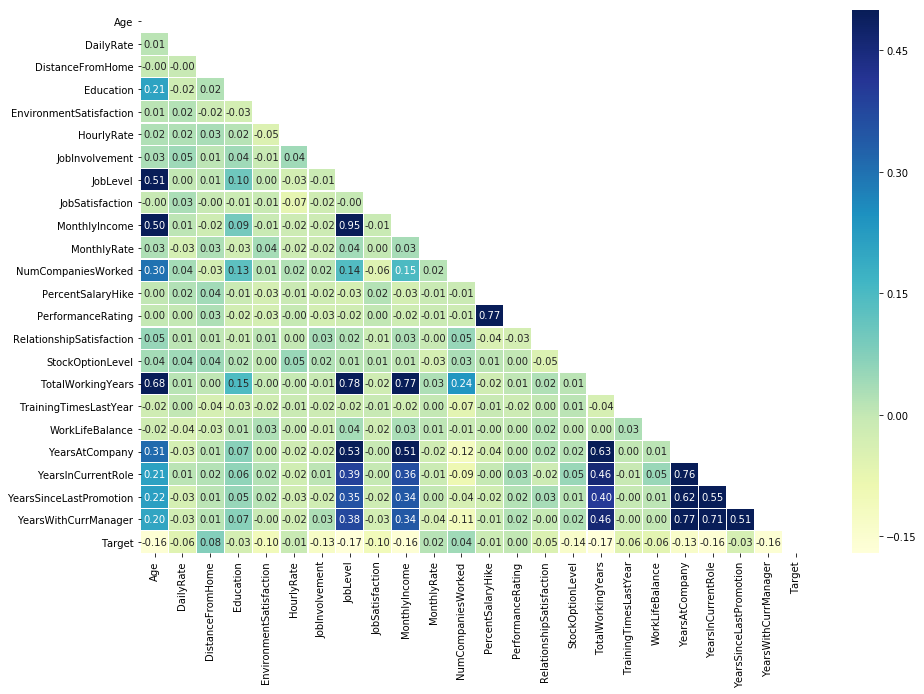

In [26]:
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, vmax=.5, mask=mask, annot=True, fmt='0.2f', linewidths=.2, cmap="YlGnBu")



In [27]:
#label encoding object

label_encoder = LabelEncoder()

print(df_human_resources.shape)
df_human_resources.head()



(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [28]:
#label encoding columns with values <= 2

label_encoder_count = 0
for col in df_human_resources.columns[1:] :
    if df_human_resources[col].dtype == 'object':
        if len(list(df_human_resources[col].unique())) <= 2 :
            label_encoder.fit(df_human_resources[col])
            df_human_resources[col] = label_encoder.transform(df_human_resources[col])
            label_encoder_count += 1

print('{} columns were label enconded.'.format(label_encoder_count))

df_human_resources = pd.get_dummies(df_human_resources, drop_first = True)

print(df_human_resources.shape)
df_human_resources.head()



4 columns were label enconded.
(1470, 49)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [29]:
scale = MinMaxScaler(feature_range=(0, 5))
humRes_col = list(df_human_resources.columns)
humRes_col.remove('Attrition')


In [30]:
for col in humRes_col:
    df_human_resources[col] = df_human_resources[col].astype(float)
#     df_human_resources[col] = np.array(df_human_resources[col].astype(float)).reshape(-1, 1)
#     df_human_resources[[col]] = scale.fit_transform(df_human_resources[col])

df_human_resources['Attrition'] = pd.to_numeric(df_human_resources['Attrition'], downcast = 'float')
df_human_resources.head()



,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41.0,1.0,1102.0,1.0,2.0,1.0,1.0,2.0,0.0,94.0,3.0,2.0,4.0,5993.0,19479.0,8.0,0.0,1.0,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49.0,0.0,279.0,8.0,1.0,1.0,2.0,3.0,1.0,61.0,2.0,2.0,2.0,5130.0,24907.0,1.0,0.0,0.0,23.0,4.0,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,1.0,1373.0,2.0,2.0,1.0,4.0,4.0,1.0,92.0,2.0,1.0,3.0,2090.0,2396.0,6.0,0.0,1.0,15.0,3.0,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33.0,0.0,1392.0,3.0,4.0,1.0,5.0,4.0,0.0,56.0,3.0,1.0,3.0,2909.0,23159.0,1.0,0.0,1.0,11.0,3.0,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27.0,0.0,591.0,2.0,1.0,1.0,7.0,1.0,1.0,40.0,3.0,1.0,2.0,3468.0,16632.0,9.0,0.0,0.0,12.0,3.0,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
print('Size of fully enconded dataset: {}'.format(df_human_resources.shape))


Size of fully enconded dataset: (1470, 49)


In [32]:
#Assigning the target to a new dataframe and casting as a numerical feature
target = df_human_resources['Attrition'].copy()

trainX, testX, trainy, testy = train_test_split(df_human_resources, target, test_size = 0.25, random_state = 7, stratify = target)

print('Size of trainX dataset: ', trainX.shape)
print('Size of trainy dataset: ', trainy.shape)
print('Size of testX dataset: ', testX.shape)
print('Size of testy dataset: ', testy.shape)



Size of trainX dataset:  (1102, 49)
Size of trainy dataset:  (1102,)
Size of testX dataset:  (368, 49)
Size of testy dataset:  (368,)


#### Logistic regression


In [33]:

models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier( n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))


In [83]:

acc_results = []
auc_results = []
names = []
columns = [['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']]
df_results = pd.DataFrame(columns)
print(df_results)


           0             1            2              3             4
0  Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD


In [86]:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cross_validation_acc_results = model_selection.cross_val_score(
        model, trainX, trainy, cv=kfold, scoring='accuracy')
    cross_validation_auc_results = model_selection.cross_val_score(model, trainX, trainy, cv=kfold, scoring='roc_auc')

    acc_results.append(cross_validation_acc_results)
    auc_results.append(cross_validation_auc_results)
    names.append(name)
    df_results.loc[i] = [name, round(cross_validation_acc_results.mean()*100, 2), round(cross_validation_auc_results.std()*100, 2), round(cross_validation_acc_results.mean()*100, 2), round(cross_validation_auc_results.std()*100, 2)]
    i += 1

# df_results.sort_values(by=['ROC AUC Mean'], ascending=False)
print(df_results)

                          0      1     2      3     4
0       Logistic Regression    100     0    100     0
1             Random Forest    100     0    100     0
2                       SVM  83.84     0  83.84     0
3                       KNN  82.22  6.92  82.22  6.92
4  Decision Tree Classifier    100     0    100     0
5               Gaussian NB  99.45  1.85  99.45  1.85


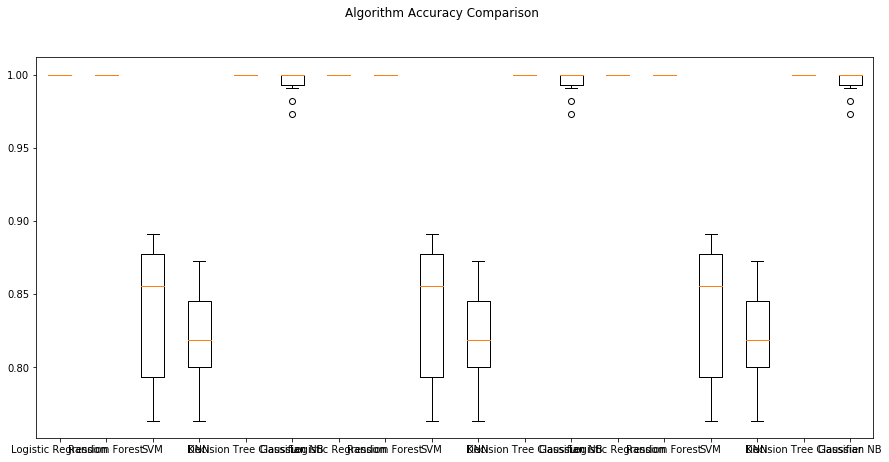

In [87]:

fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()



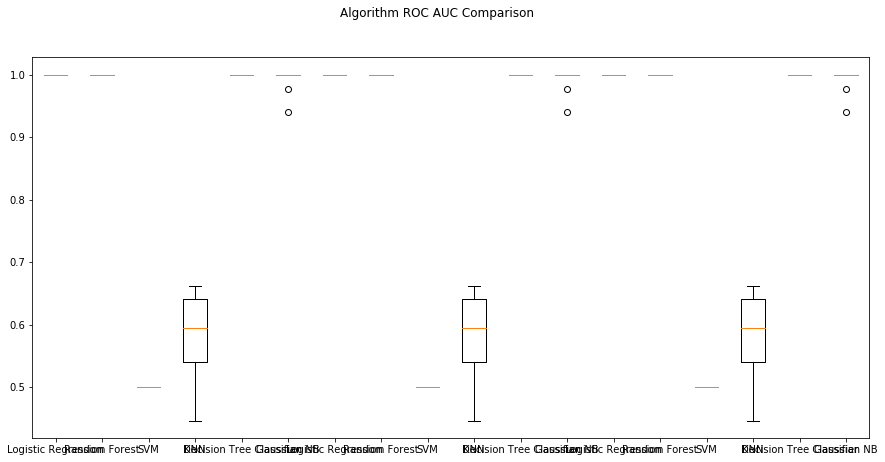

In [88]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()


In [37]:

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear', class_weight="balanced", random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, trainX, trainy, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))



AUC score (STD): 1.00 (0.00)


In [104]:
# param_grid = {'alpha': np.arange(1e-03, 2, 0.01)}

parameter_grid = {'C': np.arange(1e-03, 2, 0.01)}
# logis_gsch = GridSearchCV(LogisticRegression(solver='liblinear', class_weight='balanced', random_state=7), iid = True, return_train_score = True, param_grid = param_grid, scoring = 'roc_auc', cv = 10)
logis_gsch = GridSearchCV(LogisticRegression(solver='liblinear'), iid = True, return_train_score = True, param_grid = parameter_grid, scoring = 'roc_auc', cv = 10)


logis_grid = logis_gsch.fit(trainX, trainy)
logis_gopt = logis_grid.best_estimator_
result = logis_gsch.cv_results_

print('='*32)
print('best estimator: ' + str(logis_gsch.best_estimator_))
print('best parameters: ' + str(logis_gsch.best_params_))
print('best score: ', logis_gsch.best_score_)
print('='*32)



best estimator: LogisticRegression(C=0.12099999999999998, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
best parameters: {'C': 0.12099999999999998}
best score:  1.0


In [81]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [105]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
model_cross_validation = LogisticRegression(solver='liblinear', class_weight="balanced", random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(model_cross_validation, trainX, trainy, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))



AUC score (STD): 1.00 (0.00)


In [106]:
logis_gopt.fit(trainX, trainy)
probably = logis_gopt.predict_proba(testX)
probably = probably[:, 1]
log_roc_auc = roc_auc_score(testy, probably)
print('AUC: %0.5f' % log_roc_auc)



AUC: 1.00000


In [120]:
#Random Forest

random_forest_classifier = RandomForestClassifier(class_weight = "balanced", random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175], 'min_samples_split':[2,4,6,8,10], 'min_samples_leaf': [1, 2, 3, 4], 'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(random_forest_classifier, iid=True, return_train_score=True, param_grid=param_grid, scoring='roc_auc', cv=10)

grid_fit = grid_obj.fit(trainX, trainy)
random_forest_optimization = grid_fit.best_estimator_




In [121]:
print('='*20)
print("best estimator: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best estimator: RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=None, oob_score=False, random_state=7,
            verbose=0, warm_start=False)
best params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
best score: 1.0


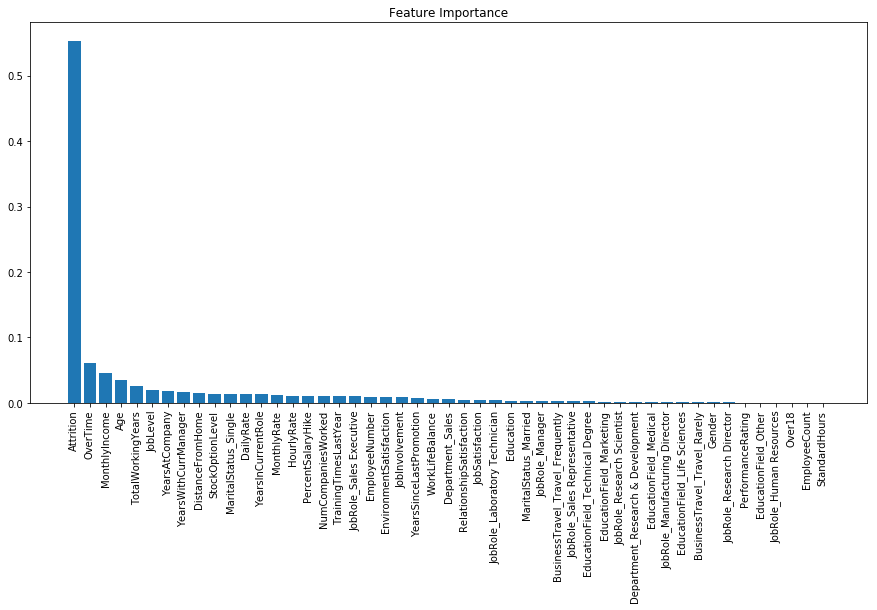

In [123]:
importances = random_forest_optimization.feature_importances_
indices = np.argsort(importances)[::-1]
names = [trainX.columns[i] for i in indices]
plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(trainX.shape[1]), importances[indices])
plt.xticks(range(trainX.shape[1]), names, rotation=90)
plt.show()



In [124]:
importances = random_forest_optimization.feature_importances_
df_paramater_coefficient = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = trainX.columns[i]
    coeff = importances[i]
    df_paramater_coefficient.loc[i] = (feat, coeff)
df_paramater_coefficient.sort_values(by='Coefficient', ascending=False, inplace=True)
df_paramater_coefficient = df_paramater_coefficient.reset_index(drop=True)
df_paramater_coefficient.head(10)



,Feature,Coefficient
0,Attrition,0.553677
1,OverTime,0.061408
2,MonthlyIncome,0.046103
3,Age,0.035267
4,TotalWorkingYears,0.025376
5,JobLevel,0.020006
6,YearsAtCompany,0.018288
7,YearsWithCurrManager,0.016373
8,DistanceFromHome,0.015431
9,StockOptionLevel,0.014389


([<matplotlib.axis.YTick at 0x7fb5f2d62d68>,
 <a list of 2 Text yticklabel objects>)

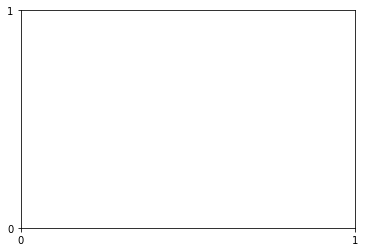

In [140]:
confuson_matrix = metrics.confusion_matrix(testy, random_forest_optimization.predict(testX))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


Text(0.5, 15.0, 'Predicted label')

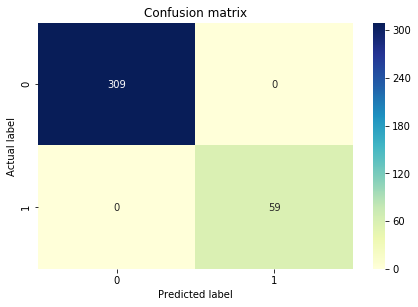

In [126]:
# create heatmap
sns.heatmap(pd.DataFrame(confuson_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [127]:
print('Accuracy of RandomForest Regression Classifier on test set: {:0.2f}'.format(random_forest_optimization.score(testX, testy)*100))
random_forest_optimization.fit(trainX, trainy)
print(classification_report(testy, random_forest_optimization.predict(testX)))



Accuracy of RandomForest Regression Classifier on test set: 100.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       309
         1.0       1.00      1.00      1.00        59

   micro avg       1.00      1.00      1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



In [128]:
random_forest_optimization.fit(trainX, trainy)
probs = random_forest_optimization.predict_proba(testX)
probs = probs[:, 1]
random_forest_optimization_roc_auc = roc_auc_score(testy, probs)
print('AUC score: %0.3f' % random_forest_optimization_roc_auc)




AUC score: 1.000


In [134]:
ranFor_class = RandomForestClassifier(class_weight = 'balanced', random_state = 7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175, 200], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_depth': [5, 10, 15, 20, 25, 30]}
grid_object = GridSearchCV(ranFor_class, iid = True, return_train_score = True, param_grid = param_grid, scoring = 'roc_auc', cv = 10)

fitGrid = grid_object.fit(trainX, trainy)
ranFor_opt = fitGrid.best_estimator_

print('='*30)
print('best: ' + str(grid_object.best_estimator_))
print('best: ' + str(grid_object.best_params_))
print('best: ', grid_object.best_score_)
print('='*30)



best: RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=None, oob_score=False, random_state=7,
            verbose=0, warm_start=False)
best: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
best:  1.0


In [135]:
ranFor_opt.fit(trainX, trainy)
probably2 = ranFor_opt.predict_proba(testX)
probably2 = probably2[:, 1]
ranFor_opt_roc_auc = roc_auc_score(testy, probably2)
print('AUC: %0.5f' % ranFor_opt_roc_auc)

fpr, tpr, thresholds = roc_curve(testy, logis_gopt.predict_proba(testX)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(testy, random_forest_optimization.predict_proba(testX)[:,1])
plt.figure(figsize=(14, 6))



AUC: 1.00000


<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

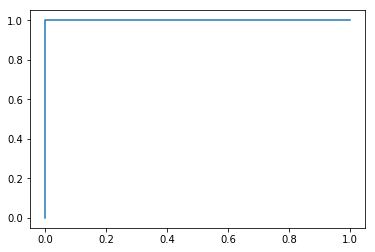

In [136]:
# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)


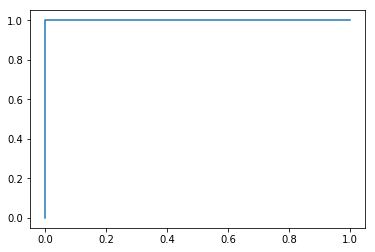

In [137]:
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % random_forest_optimization_roc_auc)


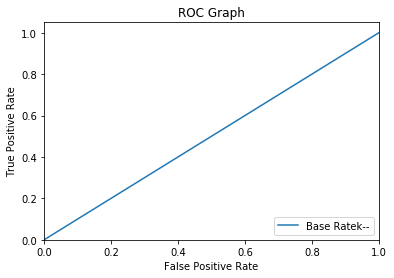

In [138]:
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()